In [1]:
from donut import *
from math import *
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from pylab import *
import os

%matplotlib inline

import pandas as pd
import seaborn as sns

palette = sns.color_palette()

#sns.palplot(sns.color_palette("husl", 8))
cm = sns.light_palette("magenta",as_cmap=True)
sns.set(style='ticks',palette='husl')
cmm = sns.light_palette("#8e0152",as_cmap=True)
cmg = sns.light_palette("#276419",as_cmap=True)
cmdg = sns.light_palette("#006837",as_cmap=True)


w = cruller.WordList()
w.LoadFromFile("/Users/Rylan/cisc/creamTeam/wordLists/WordList_100000_combined_check.dat")

k = bearclaw.MakeStandardKeyboard()
k.RemoveKey('.')

kStan = k


In [7]:
finalfilename = "/Users/Rylan/cisc/creamTeam/donutData/systematics/distStudy/distStudy_fn3_100k_nn.dat"
if os.path.exists(finalfilename):
    print(finalfilename)
    datNN = cruller.TrainingDataFileFormat()
    datNN.LoadFromFile(finalfilename)

finalfilename = "/Users/Rylan/cisc/creamTeam/donutData/systematics/distStudy/distStudy_fn3_100k_cart.dat"
if os.path.exists(finalfilename):
    print(finalfilename)
    datCart = cruller.TrainingDataFileFormat()
    datCart.LoadFromFile(finalfilename)

/Users/Rylan/cisc/creamTeam/donutData/systematics/distStudy/distStudy_fn3_100k_nn.dat
/Users/Rylan/cisc/creamTeam/donutData/systematics/distStudy/distStudy_fn3_100k_cart.dat


In [3]:
#print(finalDatList[0].PythonData()[1][0][1]["spatial"])
#print(finalDatList[0].PythonData()[1][1])
#print(finalDatList[0].PythonData()[1][2])
print(datNN.PythonData()[0])
print()
print(datCart.PythonData()[0])

{'distancemeasure': 'fann net with 5 interps', 'wordlistname': 'google_20k', 'wordlist': <donut.cruller.WordList object at 0x7fb14446b618>, 'inputmodel': 'five interpolations, no bez'}

{'distancemeasure': 'cart dist with 5 interps', 'wordlistname': 'google_20k', 'wordlist': <donut.cruller.WordList object at 0x7fb1451b8418>, 'inputmodel': 'five interpolations, no bez'}


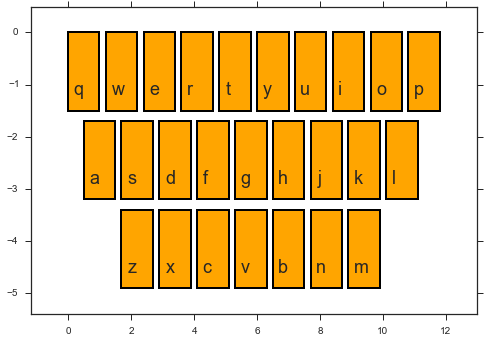

In [8]:
nnAvg, cartAvg = 0,0

meta, eff = datNN.PythonData()
for keyboard, d in eff:
    spNN = 1-d['spatial'].Fitness()
    spNNerr = d['spatial'].Error()
    cuNN = 1-d['cubic'].Fitness()
    cuNNerr = d['cubic'].Error()
    herNN = 1-d['hermite'].Fitness()
    herNNerr = d['hermite'].Error()
    monNN = 1-d['monotonic'].Fitness()
    monNNerr = d['monotonic'].Error()
    modNN = 1-d['modCubic'].Fitness()
    modNNerr = d['modCubic'].Error()
    bearclaw.DrawKeyboard(keyboard)
    
meta, eff = datCart.PythonData()
for keyboard, d in eff:
    spC = 1-d['spatial'].Fitness()
    spCerr = d['spatial'].Error()
    cuC = 1-d['cubic'].Fitness()
    cuCerr = d['cubic'].Error()
    herC = 1-d['hermite'].Fitness()
    herCerr = d['hermite'].Error()
    monC = 1-d['monotonic'].Fitness()
    monCerr = d['monotonic'].Error()
    modC = 1-d['modCubic'].Fitness()
    modCerr = d['modCubic'].Error()
           

In [11]:
avgNN = (spNN+cuNN+herNN+monNN+modNN)/5
avgNNerr = math.sqrt(spNNerr**2+cuNNerr**2+herNNerr**2+monNNerr**2+modNNerr**2)/5
avgC = (spC+cuC+herC+monC+modC)/5
print("Neural Net Error Rate: ",avgNN,"+/-",avgNNerr)
print("Cartesian Error Rate:  ",avgC)

Neural Net Error Rate:  0.1530662000001278 +/- 0.00035181900201172744
Cartesian Error Rate:   0.14882530000012964


In [6]:
print(spNNerr, spCerr)
print(spNN, spC)
print(cuNN, cuC)
print(herNN, herC)
print(monNN, monC)
print(modNN, modC)

0.00244694470513799 0.004092171917209736
0.15881000000001144 0.2127
0.14323500000001044 0.2229
0.14263000000001358 0.21089999999999998
0.15799500000000932 0.20599999999999996
0.1540550000000127 0.2509
